# IU Aur
Another changing-inclination eclisping binary in TESS

This one also [well studied](https://ui.adsabs.harvard.edu/abs/1994A%26A...284..853D/abstract), with archival data going back to late 1800's as well (1892)


This system is an O+B EB, w/ ~17Msun companion

A good lightcurve is easy to get from Eleanor... Add it to the list of awesome systems to study!

In [1]:
# following basic eleanor tutorial
# https://adina.feinste.in/eleanor/getting_started/tutorial.html

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [3]:
import eleanor
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

In [30]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [4]:
star = eleanor.Source(name='IU Aur')

Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 19...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Target Acquired
Cadences Calculated
Quality Flags Assured
CBVs Made
Success! Sector 19 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


In [5]:
print(star.tic, star.gaia, star.tess_mag)

2940839 182856896896621952 8.1428


In [7]:
data = eleanor.TargetData(star)

In [9]:
data

Text(0.5, 0, 'Time [BJD - 2457000]')

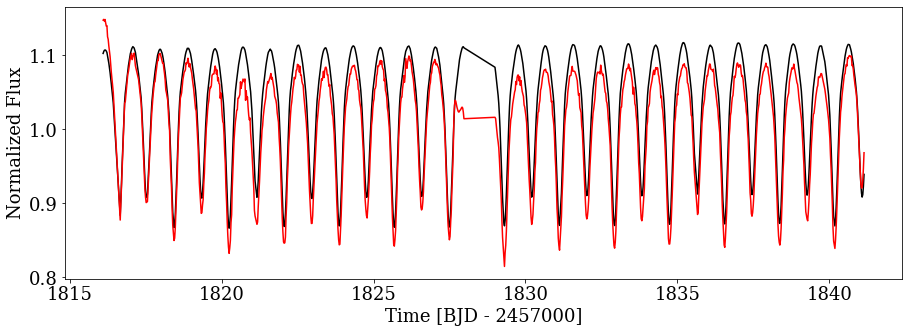

In [31]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
# plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
# plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')

In [12]:
TBJD0 = 2457000

ephem = 2447469.5535 
per = 1.811474

Text(0.5, 1.0, 'IU Aur, TESS Sector 019, Eleanor v1.0.5')

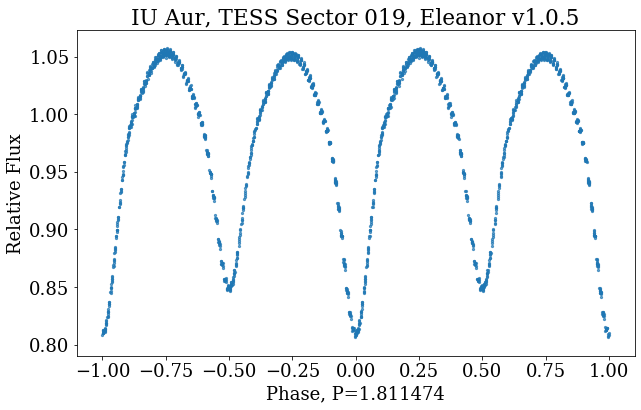

In [32]:
plt.figure(figsize=(10,6))
# plt.scatter(((data.time[q] + TBJD0 - ephem) % per)/per, 
#             data.corr_flux[q]/np.nanmedian(data.corr_flux[q]), 
#             s=5)
plt.scatter(((data.time[q] + TBJD0 - ephem) % per)/per, 
            data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 
            s=5, c='C0', alpha=0.7)
plt.scatter(((data.time[q] + TBJD0 - ephem) % per)/per-1, 
            data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 
            s=5, c='C0', alpha=0.7)


plt.xlabel('Phase, P='+str(per))
plt.ylabel('Relative Flux')
plt.title('IU Aur, TESS Sector 019, Eleanor v'+eleanor.__version__)

(-0.2, 0.2)

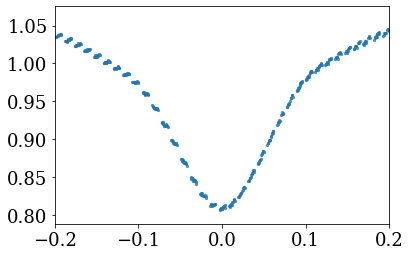

In [33]:
# VERY low O-C shift.... But this probably is a very good point-in-time measurment

plt.scatter(((data.time[q] + TBJD0 - ephem) % per)/per, 
            data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 
            s=5, c='C0', alpha=0.7)
plt.scatter(((data.time[q] + TBJD0 - ephem) % per)/per-1, 
            data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 
            s=5, c='C0', alpha=0.7)

plt.xlim(-0.2, 0.2)